# SQLAlchemy Challenge
---
## By David Girma

In [228]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
from matplotlib import pyplot as plt


In [60]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [21]:
# Python SQL toolkit and Object Relational Mapper
    import sqlalchemy
    from sqlalchemy.ext.automap import automap_base
    from sqlalchemy.orm import Session
    from sqlalchemy import create_engine, func

In [23]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [33]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [41]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [50]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [53]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [272]:
# Find the most recent date in the data set.
most_recent_date = (session.query(Measurement.date).order_by(Measurement.date.desc()).first())
most_recent_date

('2017-08-23',)

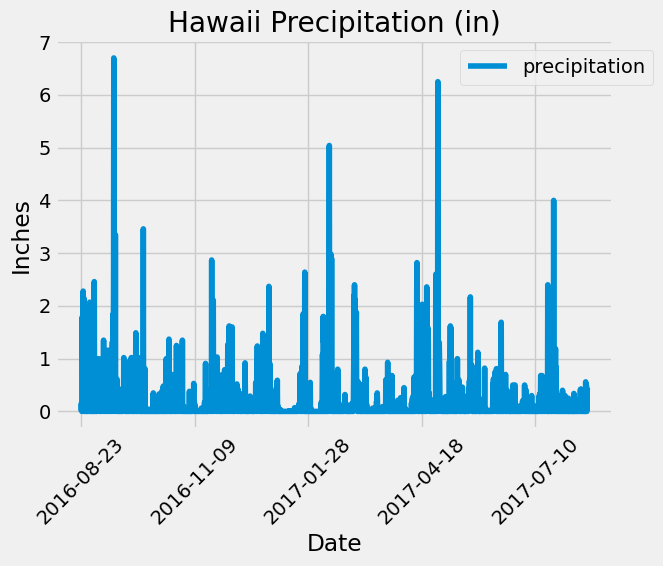

In [310]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.
ending_point = dt.date(int(str(most_recent_date)[2:6]), int(str(most_recent_date)[7:9]), int(str(most_recent_date)[10:12]))

# Calculate the date one year from the last date in data set.
starting_point = ending_point - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
prcp = session.query(Measurement.date, Measurement.prcp)\
    .filter(Measurement.date >= starting_point)\
    .order_by(Measurement.date).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(prcp, columns=["date", "precipitation"]).fillna(0)

# Sort the dataframe by date
prcp_df.set_index(prcp_df["date"])

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot("date", "precipitation")

plt.xlabel("Date")
plt.ylabel("Inches")
plt.title("Hawaii Precipitation (in)")
plt.legend(["precipitation"],loc="upper center", bbox_to_anchor=(0.9, 1))
plt.xticks(rotation=45)
plt.yticks()
plt.show()

In [312]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,precipitation
count,2230.000000
mean,0.160664
std,0.442067
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


# Exploratory Station Analysis

In [280]:
# Design a query to calculate the total number of stations in the dataset
num_stations = session.query(Station.id).count()
num_stations

9

In [302]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stations = session.query(Measurement.station,func.count(Measurement.station))\
    .group_by(Measurement.station)\
    .order_by(func.count(Measurement.station).desc()).all()
stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [314]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = stations[0][0]

most_active_station_desc = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs))\
    .filter(Measurement.station==most_active_station).all()
most_active_station_desc

[(54.0, 85.0, 71.66378066378067)]

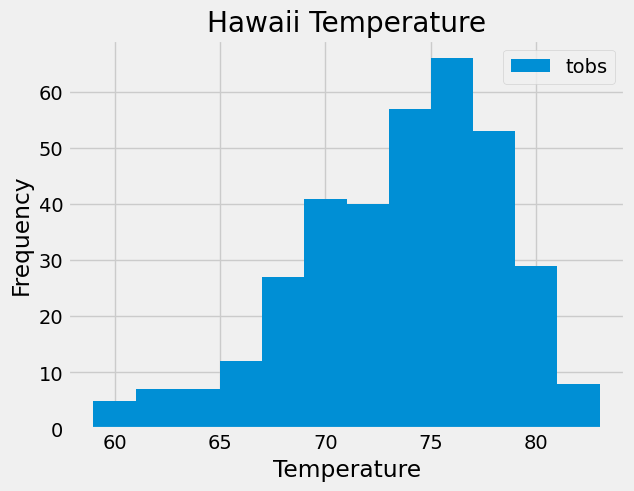

In [324]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_station_temp = session.query(Measurement.tobs)\
    .filter(Measurement.station==most_active_station)\
    .filter(Measurement.date>=starting_point).all()

most_active_station_temp_df = pd.DataFrame(most_active_station_temp,columns=['tobs'])

most_active_station_temp_df.plot.hist(bins=12)

plt.title("Hawaii Temperature")
plt.xlabel("Temperature")
plt.ylabel("Frequency")

plt.show()

# Close Session

In [327]:
# Close Session
session.close()